In [295]:
import pandas as pd
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

#### Load datasets

In [296]:
news_data = pd.read_csv('../data/raw_analyst_ratings.csv')
stock_data = pd.read_csv('../data/GOOG_historical_data.csv')

#### Convert date columns to datetime

In [297]:
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

#### Filter news for Google (ticker 'GOOGL')

In [298]:
google_news = news_data[news_data['stock'] == 'GOOGL'].copy()  
google_news

,Unnamed: 0,headline,url,publisher,date,stock
566579,569589,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,NaT,GOOGL
566580,569590,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,NaT,GOOGL
566581,569591,Google Maps To Offer Relevant Local COVID-19 I...,https://www.benzinga.com/news/20/06/16208274/g...,Shivdeep Dhaliwal,NaT,GOOGL
566582,569592,"Starting This Week, Testing Center Alerts Will...",https://www.benzinga.com/news/20/06/16202989/s...,Benzinga Newsdesk,NaT,GOOGL
566583,569593,'A New Business Cycle': Stock Market Update Fo...,https://www.benzinga.com/news/20/06/16198139/a...,Renato Capelj,NaT,GOOGL
...,...,...,...,...,...,...
568153,571174,Google Releases Its ASIC AI Infrastructure Cal...,https://www.benzinga.com/news/18/07/12081617/g...,Benzinga_Newsdesk,2018-07-26,GOOGL
568154,571175,Google Cloud Next Event Concludes Today,https://www.benzinga.com/news/18/07/12079232/g...,Hal Lindon,2018-07-26,GOOGL
568155,571176,"Social Media, FANG Stocks Taking A Big Hit In ...",https://www.benzinga.com/news/earnings/18/07/1...,Jason Shubnell,2018-07-25,GOOGL
568156,571177,Social Stocks Following Facebook Lower After H...,https://www.benzinga.com/trading-ideas/movers/...,Benzinga Newsdesk,2018-07-25,GOOGL


In [299]:
# Identify rows with NaT in the date column
problematic_rows = google_news[google_news['date'].isna()]
print(len(problematic_rows))

10


In [300]:
google_news = google_news.dropna(subset=['date']).copy()
print(len(google_news))

1569


In [301]:
google_news

,Unnamed: 0,headline,url,publisher,date,stock
566589,569610,MoneyGram Shares Jump 50% As Western Union Rep...,https://www.benzinga.com/m-a/20/06/16156730/mo...,Neer Varshney,2020-06-02,GOOGL
566590,569611,The First Week of June Is All About the May's ...,https://www.benzinga.com/news/earnings/20/06/1...,IAM Newswire,2020-06-01,GOOGL
566591,569612,The 'Real' S&P 500 And Why The Current Rally M...,https://www.benzinga.com/opinion/20/06/1614773...,Eric Mancini,2020-06-01,GOOGL
566592,569613,UK Supply Chain Startup Beacon Raises $15M Fro...,https://www.benzinga.com/news/20/06/16146470/u...,Neer Varshney,2020-06-01,GOOGL
566593,569614,'DOJ has interviewed multiple Google competito...,https://www.benzinga.com/news/20/05/16140154/d...,Benzinga Newsdesk,2020-05-29,GOOGL
...,...,...,...,...,...,...
568153,571174,Google Releases Its ASIC AI Infrastructure Cal...,https://www.benzinga.com/news/18/07/12081617/g...,Benzinga_Newsdesk,2018-07-26,GOOGL
568154,571175,Google Cloud Next Event Concludes Today,https://www.benzinga.com/news/18/07/12079232/g...,Hal Lindon,2018-07-26,GOOGL
568155,571176,"Social Media, FANG Stocks Taking A Big Hit In ...",https://www.benzinga.com/news/earnings/18/07/1...,Jason Shubnell,2018-07-25,GOOGL
568156,571177,Social Stocks Following Facebook Lower After H...,https://www.benzinga.com/trading-ideas/movers/...,Benzinga Newsdesk,2018-07-25,GOOGL


#### Aggregate news headlines by date

In [302]:
google_news['date'] = google_news['date'].dt.date  
news_daily = google_news.groupby('date').size().reset_index(name='news_count')
google_news.head()

,Unnamed: 0,headline,url,publisher,date,stock
566589,569610,MoneyGram Shares Jump 50% As Western Union Rep...,https://www.benzinga.com/m-a/20/06/16156730/mo...,Neer Varshney,2020-06-02,GOOGL
566590,569611,The First Week of June Is All About the May's ...,https://www.benzinga.com/news/earnings/20/06/1...,IAM Newswire,2020-06-01,GOOGL
566591,569612,The 'Real' S&P 500 And Why The Current Rally M...,https://www.benzinga.com/opinion/20/06/1614773...,Eric Mancini,2020-06-01,GOOGL
566592,569613,UK Supply Chain Startup Beacon Raises $15M Fro...,https://www.benzinga.com/news/20/06/16146470/u...,Neer Varshney,2020-06-01,GOOGL
566593,569614,'DOJ has interviewed multiple Google competito...,https://www.benzinga.com/news/20/05/16140154/d...,Benzinga Newsdesk,2020-05-29,GOOGL


In [303]:
news_daily.head()

,date,news_count
0,2018-07-25,3
1,2018-07-26,4
2,2018-07-27,1
3,2018-07-29,1
4,2018-07-30,3


#### Perform Sentiment Analysis

In [304]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [305]:
# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each headline
google_news['sentiment'] = google_news['headline'].apply(get_sentiment)
google_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
566589,569610,MoneyGram Shares Jump 50% As Western Union Rep...,https://www.benzinga.com/m-a/20/06/16156730/mo...,Neer Varshney,2020-06-02,GOOGL,0.00
566590,569611,The First Week of June Is All About the May's ...,https://www.benzinga.com/news/earnings/20/06/1...,IAM Newswire,2020-06-01,GOOGL,0.25
566591,569612,The 'Real' S&P 500 And Why The Current Rally M...,https://www.benzinga.com/opinion/20/06/1614773...,Eric Mancini,2020-06-01,GOOGL,0.10
566592,569613,UK Supply Chain Startup Beacon Raises $15M Fro...,https://www.benzinga.com/news/20/06/16146470/u...,Neer Varshney,2020-06-01,GOOGL,0.00
566593,569614,'DOJ has interviewed multiple Google competito...,https://www.benzinga.com/news/20/05/16140154/d...,Benzinga Newsdesk,2020-05-29,GOOGL,0.00


In [306]:
# Aggregate sentiment scores by date
daily_sentiment = google_news.groupby('date')['sentiment'].mean().reset_index(name='avg_sentiment')
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'], errors='coerce')
daily_sentiment.head()

,date,avg_sentiment
0,2018-07-25,0.175926
1,2018-07-26,-0.009830
2,2018-07-27,0.148182
3,2018-07-29,0.500000
4,2018-07-30,-0.033939


#### Calculate Stock Movements

In [307]:
# Calculate daily returns
stock_data['daily_return'] = stock_data['Close'].pct_change() * 100  # Percentage change
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,7.942989
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,1.006362
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,-4.140766
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,1.077510


In [308]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5020 non-null   datetime64[ns]
 1   Open          5020 non-null   float64       
 2   High          5020 non-null   float64       
 3   Low           5020 non-null   float64       
 4   Close         5020 non-null   float64       
 5   Adj Close     5020 non-null   float64       
 6   Volume        5020 non-null   int64         
 7   Dividends     5020 non-null   float64       
 8   Stock Splits  5020 non-null   float64       
 9   daily_return  5019 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 392.3 KB


In [309]:
daily_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           468 non-null    datetime64[ns]
 1   avg_sentiment  468 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 KB


In [310]:
merged_data = pd.merge(stock_data, daily_sentiment, left_on='Date', right_on='date', how='left')

In [311]:
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return,date,avg_sentiment
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaT,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,7.942989,NaT,NaN
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,1.006362,NaT,NaN
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,-4.140766,NaT,NaN
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,1.077510,NaT,NaN


In [312]:
merged_data['avg_sentiment'].fillna(0, inplace=True)
merged_data.dropna(subset=['daily_return'], inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_9188\1834418008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['avg_sentiment'].fillna(0, inplace=True)


In [313]:
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return,date,avg_sentiment
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,7.942989,NaT,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,1.006362,NaT,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,-4.140766,NaT,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,1.077510,NaT,0.0
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.0,0.0,1.801895,NaT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,-5.027239,NaT,0.0
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,-2.987894,NaT,0.0
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,-0.283762,NaT,0.0
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,1.452462,NaT,0.0


In [314]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 1 to 5019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5019 non-null   datetime64[ns]
 1   Open           5019 non-null   float64       
 2   High           5019 non-null   float64       
 3   Low            5019 non-null   float64       
 4   Close          5019 non-null   float64       
 5   Adj Close      5019 non-null   float64       
 6   Volume         5019 non-null   int64         
 7   Dividends      5019 non-null   float64       
 8   Stock Splits   5019 non-null   float64       
 9   daily_return   5019 non-null   float64       
 10  date           419 non-null    datetime64[ns]
 11  avg_sentiment  5019 non-null   float64       
dtypes: datetime64[ns](2), float64(9), int64(1)
memory usage: 509.7 KB


In [315]:
# Verify date alignment
print("Stock Dates Range:", stock_data['Date'].min(), "to", stock_data['Date'].max())
print("News Dates Range:", daily_sentiment['date'].min(), "to", daily_sentiment['date'].max())

# Check for common dates
common_dates = set(stock_data['Date']).intersection(set(daily_sentiment['date']))
print("Common Dates Count:", len(common_dates))

# Check for missing dates in the news data
missing_dates = set(stock_data['Date']) - set(daily_sentiment['date'])
print("Missing Dates in News Data:", len(missing_dates))


Stock Dates Range: 2004-08-19 00:00:00 to 2024-07-30 00:00:00
News Dates Range: 2018-07-25 00:00:00 to 2020-06-02 00:00:00
Common Dates Count: 419
Missing Dates in News Data: 4601


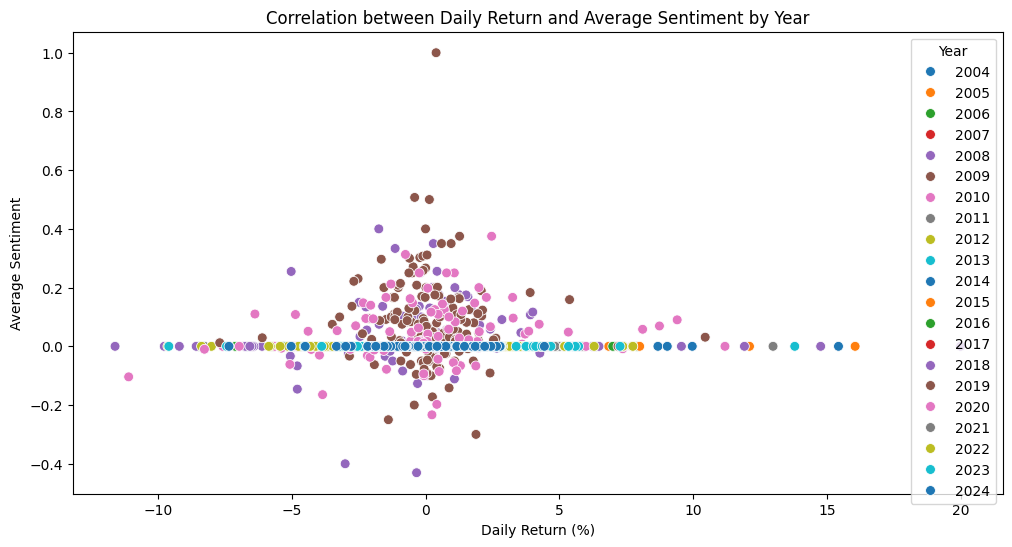

In [316]:
# Ensure 'Date' is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')

# Create a new column for the year or month to use as a hue
merged_data['Year'] = merged_data['Date'].dt.year

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a scatter plot with a regression line and color by Year
sns.scatterplot(x='daily_return', y='avg_sentiment', hue='Year', data=merged_data, palette='tab10', s=50)

# Add labels and title
plt.xlabel('Daily Return (%)')
plt.ylabel('Average Sentiment')
plt.title('Correlation between Daily Return and Average Sentiment by Year')

# Display the legend
plt.legend(title='Year')

# Show the plot
plt.show()